Importation des bibliothéques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## PARTIE 1

Importation des données

In [2]:
data_initiale = np.loadtxt('Data/bank_auth.txt', delimiter=',')
data_initiale = np.array(data_initiale)
data_initiale.shape

(1372, 5)

**Question 1**: Sauvegardez cet ensemble de données dans deux variables : bank data pour les données et bank labels pour les étiquettes.

In [3]:
bank_data = data_initiale[:, :-1]
bank_data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [4]:
bank_labels = data_initiale[:, 4]
bank_labels

array([0., 0., 0., ..., 1., 1., 1.])

**Question 2**: Créez deux matrices A faux (que des faux billets) et A vrais (que des vrais billets).

In [5]:
# Construction de la matrice A_faux
list_bool_faux = bank_labels == 0
A_faux = bank_data[list_bool_faux]
A_faux.shape

(762, 4)

In [6]:
# Construction de la matrice A_vrai
list_bool_vrai = bank_labels == 1
A_vrai = bank_data[list_bool_vrai]
A_vrai.shape

(610, 4)

**Question 3**: Ensuite, créez deux matrices bank train (500 objets de A_vrai et 600 objets de A_faux) et bank test (le reste).

In [7]:
# Création de 500 objet de A_vrai, et 600 objet de A_faux
A_vrai_500 = A_vrai[:500, :]
A_faux_600 = A_faux[:600, :]
bank_train = np.concatenate( (A_vrai_500, A_faux_600) )
bank_train.shape

(1100, 4)

In [8]:
# Création d'une matrice labels pour la matrice bank_train
ones_500 = np.ones( (500, 1) )
zeros_600 = np.zeros( (600, 1) )
bank_train_labels = np.concatenate( (ones_500, zeros_600) )
bank_train_labels.shape

(1100, 1)

In [9]:
# Création de bank_test qui contient le reste des objet de A_vrai aprés les 500 objet et le reste de A_faux aprés les 600 objets
A_vrai_reste = A_vrai[500: , :]
A_faux_reste = A_faux[600: , :]
bank_test = np.concatenate( (A_vrai_reste, A_faux_reste) )
bank_test.shape

(272, 4)

In [10]:
# Création d'une matrice labels pour la matrice bank_test
nbr_A_vrai_reste = A_vrai_reste.shape[0]
nbr_A_faux_reste = A_faux_reste.shape[0]
ones_reste = np.ones( (nbr_A_vrai_reste, 1) )
zeros_reste = np.zeros( (nbr_A_faux_reste, 1) )
bank_test_labels = np.concatenate( (ones_reste, zeros_reste) )
bank_test_labels.shape

(272, 1)

**Question 4**: Visualisez les données dans une figure séparée en utilisant la fonction PlotClusters

In [11]:
from sklearn.decomposition import PCA

PCA_object = PCA(n_components = 2)
PCA_object.fit(bank_data)
bank_data_pca = PCA_object.transform(bank_data)

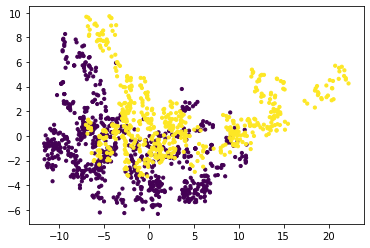

In [12]:
plt.scatter(bank_data_pca[:, 0], bank_data_pca[:, 1], s=10, c = bank_labels)
plt.show()

## Partie 2

**Question 1**: Appliquez la Semi-NMF à la matrice bank_train en utilisant la fonction seminmfnnls. Sauvegardez la matrice de prototypes obtenue dans W_train.

In [13]:
import pymf as PYMF

semiNMF = PYMF.SNMF(bank_train.T, num_base = 2)
semiNMF.factorize()

W_train = semiNMF.W
H_train = semiNMF.H

**Question 2**: Ecrivez un programme show clusters pour transformer la matrice de partition obtenue à une vraie matrice de partition I (On
cherche un élément maximal dans chaque ligne et on le remplace
par 1. Tous les autres éléments sont remplacées par 0.). Calculez
la puretée pour la matrice de partition obtenue précédemment.


In [14]:
# La procédure shwo_clusters() qui permet de transformer la matrice de partition (H_train) à une matrice de 0 et 1
def show_clusters(X):
    # La variable leX contient lenombre de ligne et de colonne de x
    lenX = np.shape(X)
      
    for i in range(0, lenX[0]):
        # maxX contient le maximum de chaque ligne i de la matrice x
        maxX = np.max(X[i])
        for j in range(0, lenX[1]):
            if X[i][j] == maxX:
                # S i l'élément (i, j) de la matrice x égale à p (le maximum de la ligne i) donc ce élément recoit 1
                X[i][j] = 1
            else :
                # Sinon, l'élément (i, j) de la matrice x recoit 0
                X[i][j] = 0
    return(X)

In [15]:
# Application de la procédure show_clusters() sur la matrice de partition (H_train)
show_clusters(H_train)
H_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# Calcule de La pureté de la vrai matrice de partition I_partition
from sklearn import metrics
purete_I_partition = metrics.accuracy_score(H_train[1, :], bank_train_labels)
purete_I_partition

0.5445454545454546

**Question 3**: Classifiez les objets sauvegardés dans bank_test en utilisant la matrice de prototypes W_train apprise pécédemment *(H_test=W train−1∗bank test)*. 
Attention! Au cas ou la matrice W_train est une matrice non carrée, on utilise le pseudo-inverse de Moore-Penrose (la commande pinv).

In [17]:
H_test = np.dot(np.linalg.pinv(W_train), bank_test.T)
H_test

array([[-0.22337648, -0.04780944,  0.61784472, ...,  1.04103377,
         0.42686882,  0.38205484],
       [ 0.03546746, -0.02012518,  1.36358805, ...,  1.22280428,
         0.01680645,  0.31428155],
       [-0.19738228,  0.90298182,  1.83056472, ...,  1.23736244,
        -0.12360935,  0.09936605],
       [-0.02604055, -0.29894711,  0.28598537, ...,  1.20940117,
         0.47380917,  0.70034993]])

In [18]:
H_labels = show_clusters(H_test.T)
H_labels = H_labels[:, 1]
H_labels

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Question 4**: Calculez les indices externes (la pureté et l’entropie pour la matrice de partition H_test). Pour cela, on utilise les commande purity et entropy.


In [19]:
# Calcule de pureté
purete_H_test = metrics.accuracy_score(H_labels,bank_test_labels)
print("La pureté est :", purete_H_test)

# Calcule de l'entropy
entropy_H_test = metrics.cluster.entropy(H_labels)
print("L'entropie est :", entropy_H_test)

La pureté est : 0.6801470588235294
L'entropie est : 0.36955376320767064


**Question 5**: Calculez les indices internes (l’indice DB de Davies et Bouldin, l’indice CH de Calinsky et Harabsz, l’indice KL de Krzanowski et Lai et l’indice de Dunn) pour la matrice de partition H_test. Pour cela, on utilise la commande valid internal deviation.

In [20]:
davies_bouldin_score_SEMI_NMF  = metrics.cluster.davies_bouldin_score(bank_test,H_labels)
print("L'ndice de Davies et Bouldin :", davies_bouldin_score_SEMI_NMF)

calinski_harabasz_score_SEMI_NMF = metrics.cluster.calinski_harabasz_score(bank_test,H_labels)
print("L'ndice de Calinsky et Harabsz :", calinski_harabasz_score_SEMI_NMF)

L'ndice de Davies et Bouldin : 3.0182012844045314
L'ndice de Calinsky et Harabsz : 7.9633970288210465


**Question 6**:  Visualisez les données avec les étiquettes obtenues en utilisant la fonction PlotClusters.


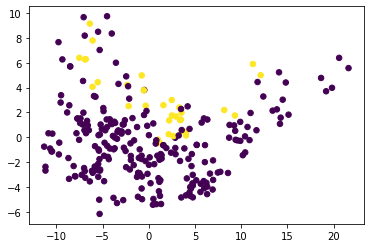

In [21]:
bank_test_pca = PCA_object.fit_transform(bank_test)
# bank_test_pca = PCA_object.transform(bank_test)
plt.scatter(bank_test_pca[:,0],bank_test_pca[:,1],s=30, c= H_labels)

## PARTIE 3

**Question 1**: Appliquez la NMF à la matrice bank_train en utilisant la fonction nmf. Sauvegardez la matrice de prototypes obtenue dans W_train.

In [22]:
def to_positive(X):
    # Le nombre de lignes et de colonnes
    lenX = np.shape(X)

    # Le minimum de X
    minX = np.min(X) 
     
    for i in range(0,lenX[0]):
        for j in range(0,lenX[1]):
            if minX < 0:
                X[i][j]= X[i][j] - minX
            else :
                X[i][j]= X[i][j] + minX 
    return(X)

In [23]:
NMF = PYMF.NMF(to_positive(bank_train).T, num_bases = 2)
NMF.factorize()

W_train = NMF.W
H_train = NMF.H

**Question 2**: Ecrivez un programme show clusters pour transformer la matrice de partition obtenue à une vraie matrice de partition I (On cherche un élément maximal dans chaque ligne et on le remplace par 1. Tous les autres éléments sont remplacées par 0.). Calculez la puretée pour la matrice de partition obtenue précédemment.

In [24]:
# Le programme showcluster() est déja programmer dans la PARTIE 2  
show_clusters(H_train)
H_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Calcule de La pureté de la vrai matrice de partition I_partition
from sklearn import metrics
purete_I_partition = metrics.accuracy_score(H_train[1, :], bank_train_labels)
purete_I_partition

0.5445454545454546

**Question 3**: Classifiez les objets sauvegardés dans bank_test en utilisant la matrice de prototypes W_train apprise pécédemment *(H_test=W train−1∗bank test)*. 
Attention! Au cas ou la matrice W_train est une matrice non carrée, on utilise le pseudo-inverse de Moore-Penrose (la commande pinv).

In [26]:
H_test = np.dot(np.linalg.pinv(W_train), bank_test.T)
H_test

array([[ -0.24314503,  -6.7060127 ,  -7.30429228,  -4.1360103 ,
          2.63420834,  11.98661545,  16.47362488,   8.09628799,
         -0.26338743,  -8.04772211,  -6.03615611,   1.19827099,
          9.40939914,  12.01845904,   4.36396836,  -2.53543106,
         -8.3155124 ,  -7.89604261,   1.55287341,   8.14398265,
          7.27118947,  -1.34334781,  -7.45982495, -10.01314199,
         -8.91398832,  -1.92996542,   1.68784425,   0.62400097,
         -4.41548045,  -6.43889363,  -6.62447436,  -4.89001462,
         -7.72750384,  -2.15306194,  -0.22245661,  -1.81098993,
         -5.02845575,  -4.28290566,  -2.47018933,  -2.75805145,
          2.49232529,  11.35436825,  10.82835621,  -3.95090088,
         -3.10963667,   7.28518626,  19.766029  ,  13.41469874,
          2.38014582,  -3.99499154,   0.62464266,  11.33769136,
         19.52005129,  13.75158828,   2.29426054,  -4.74675309,
         -4.60401603,   0.06758658,   8.99260978,  13.39825283,
          8.73933719,   0.52448329,  -5.

In [27]:
H_labels = show_clusters(H_test.T)
H_labels = H_labels[:, 0]
H_labels

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0.

**Question 4**: Calculez les indices externes (la pureté et l’entropie pour la matrice de partition H_test). Pour cela, on utilise les commande purity et entropy.

In [28]:
# Calcule de pureté
purete_H_test = metrics.accuracy_score(H_labels,bank_test_labels)
print("La pureté est :", purete_H_test)

# Calcule de l'entropy
entropy_H_test = metrics.cluster.entropy(H_labels)
print("L'entropie est :", entropy_H_test)

La pureté est : 0.5845588235294118
L'entropie est : 0.6733086769780607


**Question 5**: Calculez les indices internes (l’indice DB de Davies et Bouldin, l’indice CH de Calinsky et Harabsz, l’indice KL de Krzanowski et Lai et l’indice de Dunn) pour la matrice de partition H_test. Pour cela, on utilise la commande valid internal deviation.

In [29]:
davies_bouldin_score_NMF  = metrics.cluster.davies_bouldin_score(bank_test,H_labels)
print("L'ndice de Davies et Bouldin :", davies_bouldin_score_NMF)

calinski_harabasz_score_NMF = metrics.cluster.calinski_harabasz_score(bank_test,H_labels)
print("L'ndice de Calinsky et Harabsz :", calinski_harabasz_score_NMF)

L'ndice de Davies et Bouldin : 0.9287248950872148
L'ndice de Calinsky et Harabsz : 260.7992688977171


**Question 6**:  Visualisez les données avec les étiquettes obtenues en utilisant la fonction PlotClusters.

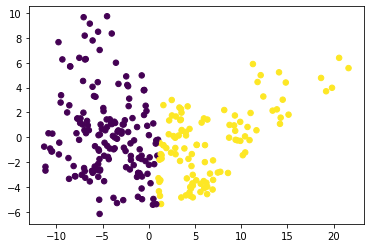

In [30]:
bank_test_pca = PCA_object.fit_transform(bank_test)
# bank_test_pca = PCA_object.transform(bank_test)
plt.scatter(bank_test_pca[:,0],bank_test_pca[:,1],s=30, c= H_labels);

## PARTIE 4

**Question**:  Appliquez Symmetric NMF à la matrice K_test.

In [33]:
# Avant d'appliquer le NMF symétrique, il faut d'abord l'implémenter.
def symetricNMF(X,r,niter=None):       
    shapeX = len(X)
    W = np.random.rand(shapeX, r)

    for t in range(1,niter):
        # Mise à jour
        W = np.multiply(W, (0.5 + np.dot(0.5, (np.dot(X, W))) / (np.dot(np.dot(W, W.T), W))))
    return W

### σ = 1

**Question 1**: Calculez la matrice de Gram K_test en utilisant la commande kernelRBF avec σ = 1.

In [35]:
from sklearn.metrics.pairwise import rbf_kernel
K_test = rbf_kernel(bank_test, bank_test, 1)
K_test.shape

(272, 272)

**Question 2**: Calculez les indices externes et internes pour la matrice de partition.


In [37]:
matSymetric = symetricNMF(K_test, 2, 1)
matResult = show_clusters(matSymetric)
matResult = matResult[:, 0]
matResult

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0.

In [41]:
# Calcule des indices internes 
# 1. Calcule de Pureté
purete_symetricNMF =  metrics.accuracy_score(matResult, bank_test_labels)
print("La pureté est :", purete_symetricNMF)

# 2. Calcule de Entropy
entropy_symetricNMF = metrics.cluster.entropy(matResult)
print("L'entropie est :", entropy_symetricNMF)

La pureté est : 0.48161764705882354
L'entropie est : 0.6909559169164965


In [45]:
# Calcule des indices externes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_symetricNMF  = metrics.cluster.davies_bouldin_score(bank_test, matResult)
print("L'indice de Davies et Bouldin est :", davies_bouldin_score_symetricNMF)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_symetricNMF  = metrics.cluster.calinski_harabasz_score(bank_test, matResult)
print("L'indice de CH de Calinsky et Harabsz est :", calinski_harabasz_score_symetricNMF)

L'indice de Davies et Bouldin est : 19.966591340139153
L'indice de CH de Calinsky et Harabsz est : 0.5378894383059317


**Question 3**: Visualisez les données avec les étiquettes obtenues en utilisant la fonction PlotClusters?

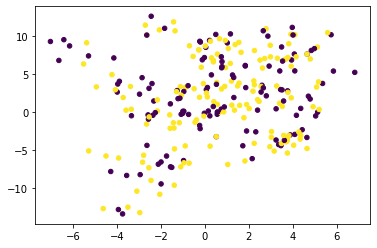

In [47]:
plt.scatter(bank_test[:, 0], bank_test[:, 1], s = 20, c = matResult);

### σ = 2

**Question 1:** Calculez la matrice de Gram K_test en utilisant la commande kernelRBF avec σ = 2.

In [48]:
K_test = rbf_kernel(bank_test, bank_test, 2)
K_test.shape

(272, 272)

**Question 2**: Calculez les indices externes et internes pour la matrice de partition.

In [57]:
matSymetric = symetricNMF(K_test, 2, 1)
matResult = show_clusters(matSymetric)
matResult = matResult[:, 0]
matResult

array([0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0.

In [60]:
# Calcule des indices internes 
# 1. Calcule de Pureté
purete_symetricNMF =  metrics.accuracy_score(matResult, bank_test_labels)
print("La pureté est :", purete_symetricNMF)

# 2. Calcule de Entropy
entropy_symetricNMF = metrics.cluster.entropy(matResult)
print("L'entropie est :", entropy_symetricNMF)

La pureté est : 0.4852941176470588
L'entropie est : 0.6878393399287344


In [61]:
# Calcule des indices externes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_symetricNMF  = metrics.cluster.davies_bouldin_score(bank_test, matResult)
print("L'indice de Davies et Bouldin est :", davies_bouldin_score_symetricNMF)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_symetricNMF  = metrics.cluster.calinski_harabasz_score(bank_test, matResult)
print("L'indice de CH de Calinsky et Harabsz est :", calinski_harabasz_score_symetricNMF)

L'indice de Davies et Bouldin est : 6.385450482253085
L'indice de CH de Calinsky et Harabsz est : 5.245489022848312


**Question 3**: Visualisez les données avec les étiquettes obtenues en utilisant la fonction PlotClusters?

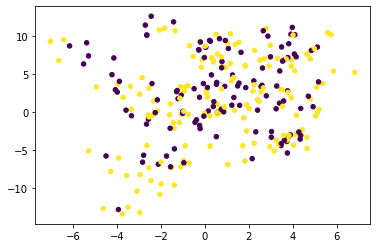

In [63]:
plt.scatter(bank_test[:, 0], bank_test[:, 1], s = 20, c = matResult);

### paramètres [1, 0, 2]

**Question 1:** Calculez la matrice de Gram K_test en utilisant la commande kernelRBF avec les paramètres [1, 0, 2].

In [64]:
from sklearn.metrics.pairwise import polynomial_kernel
K_test = polynomial_kernel(bank_test, bank_test, 1, 0, 2)
K_test.shape

(272, 272)

**Question 2**: Calculez les indices externes et internes pour la matrice de partition.

In [65]:
matSymetric = symetricNMF(K_test, 2, 1)
matResult = show_clusters(matSymetric)
matResult = matResult[:, 0]
matResult

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1.

In [66]:
# Calcule des indices internes 
# 1. Calcule de Pureté
purete_symetricNMF =  metrics.accuracy_score(matResult, bank_test_labels)
print("La pureté est :", purete_symetricNMF)

# 2. Calcule de Entropy
entropy_symetricNMF = metrics.cluster.entropy(matResult)
print("L'entropie est :", entropy_symetricNMF)

La pureté est : 0.5
L'entropie est : 0.692173681227598


In [67]:
# Calcule des indices externes
# 1. Indice de DB de Davies et Bouldin
davies_bouldin_score_symetricNMF  = metrics.cluster.davies_bouldin_score(bank_test, matResult)
print("L'indice de Davies et Bouldin est :", davies_bouldin_score_symetricNMF)

# 2. Indice de CH de Calinsky et Harabsz
calinski_harabasz_score_symetricNMF  = metrics.cluster.calinski_harabasz_score(bank_test, matResult)
print("L'indice de CH de Calinsky et Harabsz est :", calinski_harabasz_score_symetricNMF)

L'indice de Davies et Bouldin est : 46.08048141731228
L'indice de CH de Calinsky et Harabsz est : 0.10089757624204039


**Question 3**: Visualisez les données avec les étiquettes obtenues en utilisant la fonction PlotClusters?

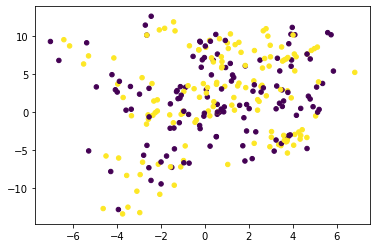

In [68]:
plt.scatter(bank_test[:, 0], bank_test[:, 1], s = 20, c = matResult);